In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
st = pd.read_csv('data/studentInfo.csv')

In [3]:
st.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


**StudentInfo Dataset description**
* There are 32953 rows in the dataset, but only **28785 unique students**
* 52% of students are male, 48% of students are female
* 84% of students level of education is A level or below
* 70% of student are 35 or under, 29% is between 35 and 55, the remaining 1% is above the age of 55 

Due to some student repeating modules, for the initial demographic analysis I will remove their duplicate information and only keep one record per student.

In [6]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [18]:
#dropping multiple records from the dataset
st_clean = pd.DataFrame.drop_duplicates (st, subset = 'id_student')

In [19]:
st_clean.id_student.value_counts()

397310     1
593707     1
396907     1
341612     1
513648     1
          ..
2600000    1
566337     1
638018     1
504899     1
591873     1
Name: id_student, Length: 28785, dtype: int64

M    0.522703
F    0.477297
Name: gender, dtype: float64

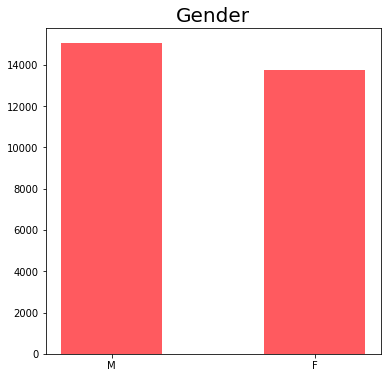

In [20]:
#plt.figure(figsize=(6,6))
#plt.title('Student Gender')
#plt.hist(st.highest_education,rwidth=5);

def plot_cat_var(column,title,size=(10,6)):
    new_d = dict(column.value_counts())
    d_keys = list(new_d.keys())
    d_values = list(new_d.values())

    plt.figure(figsize=size)
    plt.bar(d_keys, d_values,color='#ff5a5f', width=0.5)
    plt.title(title,fontsize=20)

plot_cat_var(st_clean.gender,'Gender',size=(6,6))
st_clean.gender.value_counts(normalize=True)

A Level or Equivalent          0.429217
Lower Than A Level             0.409241
HE Qualification               0.142157
No Formal quals                0.010631
Post Graduate Qualification    0.008755
Name: highest_education, dtype: float64

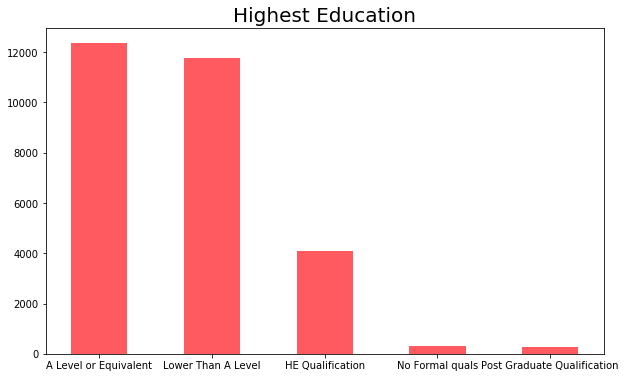

In [21]:
plot_cat_var(st_clean.highest_education,'Highest Education')
st_clean.highest_education.value_counts(normalize=True)

0-35     0.699844
35-55    0.293973
55<=     0.006184
Name: age_band, dtype: float64

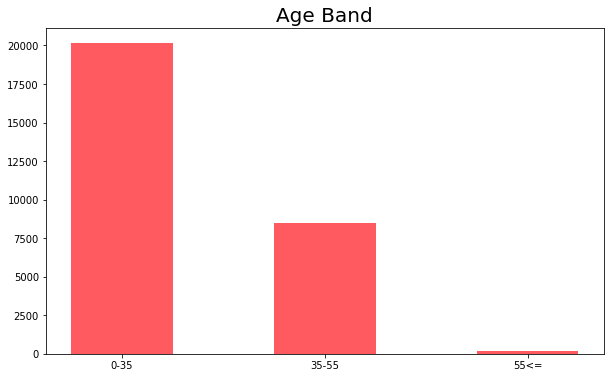

In [23]:
plot_cat_var(st_clean.age_band,'Age Band')
st_clean.age_band.value_counts(normalize=True)

N    0.905611
Y    0.094389
Name: disability, dtype: float64

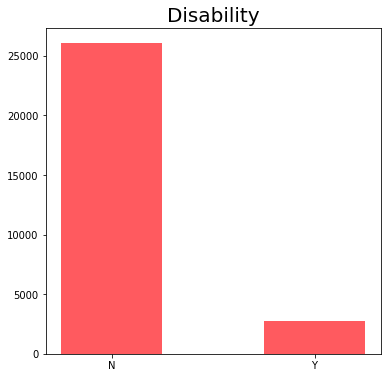

In [24]:
plot_cat_var(st_clean.disability,'Disability',size=(6,6))
st_clean.disability.value_counts(normalize=True)

**Final Results**
* 38% of students have finished their modules + 10% with a distinction
* 31% have withdrawn from a module
* 21% of students failed
* OPTION OF ANALYSIS - DOES THE AMOUNT OF INTERACTIONS EFFECT OF GETTING A DISTINCTION?

Pass           0.376342
Withdrawn      0.314157
Fail           0.217613
Distinction    0.091888
Name: final_result, dtype: float64

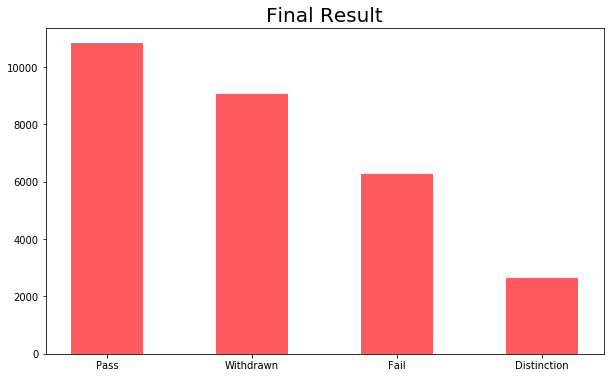

In [26]:
plot_cat_var(st_clean.final_result,'Final Result')
st_clean.final_result.value_counts(normalize=True)

Pass           0.379253
Withdrawn      0.311601
Fail           0.216365
Distinction    0.092781
Name: final_result, dtype: float64

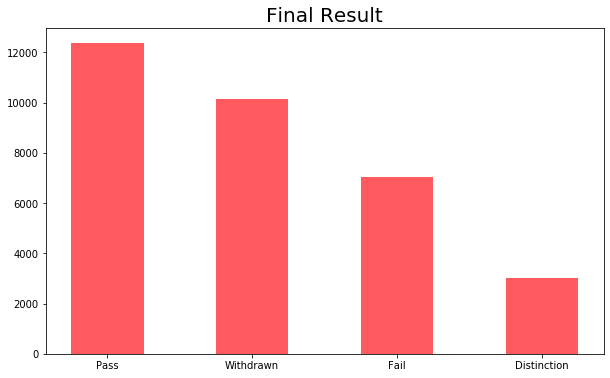

In [27]:
plot_cat_var(st.final_result,'Final Result')
st.final_result.value_counts(normalize=True)

In [29]:
vle = pd.read_csv('data/studentVle.csv')

In [30]:
vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [33]:
len(vle.id_student.unique())

26074

In [34]:
#26074 unique students have interacted with the VLE

In [35]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
code_module          object
code_presentation    object
id_student           int64
id_site              int64
date                 int64
sum_click            int64
dtypes: int64(4), object(2)
memory usage: 487.8+ MB
